# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/classification/loan_status_data/loan_status.csv')

## Data Definitions

<ul>
<li><strong>Loan_ID</strong>: A unique loan ID.</li>
<li><strong>Gender</strong>: Either male or female.</li>
<li><strong>Married</strong>: Weather Married(yes) or Not Marttied(No).</li>
<li><strong>Dependents</strong>: Number of persons depending on the client.</li>
<li><strong>Education</strong>: Applicant Education(Graduate or Undergraduate).</li>
<li><strong>Self_Employed</strong>: Self-employed (Yes/No).</li>
<li><strong>ApplicantIncome</strong>: Applicant income.</li>
<li><strong>CoapplicantIncome</strong>: Co-applicant income.</li>
<li><strong>LoanAmount</strong>: Loan amount in thousands.</li>
<li><strong>Loan_Amount_Term</strong>: Terms of the loan in months.</li>
<li><strong>Credit_History</strong>: Credit history meets guidelines.</li>
<li><strong>Property_Area</strong>: Applicants are living either Urban, Semi-Urban or Rural.</li>
<li><strong>Loan_Status</strong>: Loan approved (Y/N).</li>
</ul>

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Question 1
- Any data quality issues/concerns?
- Any clean up needed?

Insert comments here

In [5]:
# code

#There could be missing values in the data. Check for missing values and outliers.
# Either deleting the missing values or Replacing them with suitable values could work.

missing_values = df.isnull().sum()
missing_values

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Deteting rows with missing values
df = df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


The 'Loan_Status', 'Graduate', 'Gender' , 'Married' columns are currently of object data type. 
It is a binary outcome (Y/N), and converting it to a numerical representation (e.g., 1/0) might 
be beneficial for modeling purposes. 


I also see that credit history is having values which are only '0' and '1', so this could be treated as an object instead of float

# Question 2
- What is the distribution of the target (`Loan_Status`)?  
- Do you have any concerns on class imbalances?

Y    219
N     89
Name: Loan_Status, dtype: int64


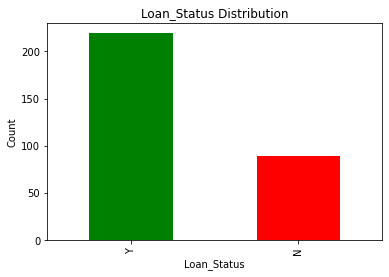

In [7]:
loan_status_distribution = df['Loan_Status'].value_counts()
print(loan_status_distribution)

plt.figure(figsize=(6, 4))
loan_status_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Loan_Status Distribution')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()


Insert comments here

The bar plot visually represents the count of each class. In this case Yes class has 219 rows and No has 89 rows. There is a notable difference in the number of instances between the two classes so it could clearly be stated as class imbalance. . This class imbalance could potentially impact the performance of a machine learning model, especially if the model is sensitive to imbalances. 

# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [8]:
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_vars = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                        'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [9]:
print('Numerical variables')
numerical_vars


Numerical variables


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [10]:
print('Categorical variables')
categorical_vars

Categorical variables


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

Insert comments here

Numerical variables are typically used for mathematical calculations, and operations like mean, median, and standard deviation make sense for these variables.
Categorical variables are those that represent categories or groups and are usually treated as labels without a meaningful numerical order.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 120.  

In [11]:
# insert code here


from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status', axis=1)  
y = df['Loan_Status'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)


print("Shapes of the sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of the sets:
X_train: (246, 12)
X_test: (62, 12)
y_train: (246,)
y_test: (62,)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [12]:
# insert code here

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                        'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()) 
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_pipeline, numerical_columns),
        ('categorical', categorical_pipeline, categorical_columns)
    ])


X_train_transformed = preprocessor.fit_transform(X_train)


print("Shape of Numerical Pipeline Output:", X_train_transformed.shape)

Shape of Numerical Pipeline Output: (246, 275)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [13]:
# insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=120))
])

pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on the training set: {accuracy_train:.2f}")
print(f"Accuracy on the test set: {accuracy_test:.2f}")

Accuracy on the training set: 0.88
Accuracy on the test set: 0.87


Insert comments here

The slight difference between the accuracy on the training set (0.88) and the accuracy on the test set (0.87) suggests a relatively small amount of overfitting, but it may not be a significant concern.  It's essential to consider additional evaluation metrics and explore ways to further optimize the model if necessary.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Insert comments here

1. Considering other evaluation metrics
2. Comparing the accuracy with other regression models.
3. Feature Engineering
4. Addressing Data Quality Issues
5. Deployment and monitoring